# Project Big Data Analytics


## Team members: 
### Aitore Issadykova
###  Assem Kussainova

In [146]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score as r2



# Loading Dataset


In [147]:
#load_dataset
train = pd.read_csv('bda-image-challenge-train.txt', header = None)
print(np.shape(train))


(9200, 1024)


In [148]:
train

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
image = train.values.reshape(9200, 32, 32)
n = len(image)

y = image[:, 8:24, 8:24].reshape(n, -1)
x = image.copy()

x[:, 8:24, 8:24] = 0
x = x.reshape(n, -1)

print(x.shape)
print(y.shape)

(9200, 1024)
(9200, 256)


# Loading Training Data

In [151]:
test = pd.read_csv("bda-image-challenge-row-testdist.txt", header=None)
print(np.shape(test))
print(test)

(920, 1025)
     0     1     2     3     4     5     6     7     8     9     ...  1015  \
0       1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1       2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2       3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3       4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4       5   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
915   916   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
916   917   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
917   918   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
918   919   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
919   920   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

     1016  1017  1018  1019  1020  1021  1022  1023

In [152]:
image_test = test.values[:, 1:]
image_test=image_test.reshape(920, 32, 32)
n1 = len(image_test)
print(image_test.shape)

(920, 32, 32)


In [153]:
y_test = image_test[:, 8:24, 8:24].reshape(n1, -1)
x_test = image_test.copy()

x_test = x_test.reshape(n1, -1)

print(x_test.shape)
print(y_test.shape)

(920, 1024)
(920, 256)


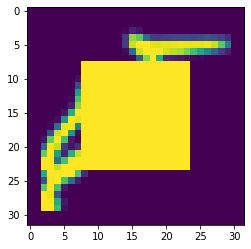

In [154]:
im1 = x_test[20].reshape(32, 32)
im1[8:24, 8:24] = y_test[221].reshape(16, 16)
plt.imshow(im1.reshape(32, 32))
plt.show()

# Keras model with kfold cross-validation

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from sklearn.model_selection import KFold


Using TensorFlow backend.


In [156]:
def kerasmodel():
    
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(16, 16), activation='relu', input_shape=(32,32,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, kernel_size=(8, 8), activation='relu'))
    model.add(MaxPooling2D(pool_size=(1, 1)))

    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(256, activation="sigmoid"))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [168]:
n_split=4
 
for train_index,test_index in KFold(n_split).split(x):
    x_trker,x_ttker=x[train_index],x[test_index]
    y_trker,y_ttker=y[train_index],y[test_index]
    ntr=len(x_trker)
    ntt=len(x_ttker)
    x_trker,y_trker =x_trker.reshape(ntr, 32, 32,1),y_trker.reshape(ntr, 256) 
    x_ttker,y_ttker =x_ttker.reshape(ntt, 32, 32,1),y_ttker.reshape(ntt, 256) 
    print(x_trker.shape,y_trker.shape )
    kermodel=kerasmodel()
    kermodel.fit( x_trker, y_trker,epochs=10)
    print('Model evaluation ',kermodel.evaluate(x_ttker,y_ttker))



(6900, 32, 32, 1) (6900, 256)
Epoch 1/10
6900/6900 [==============================] - 8s 1ms/step - loss: 492.7060 - accuracy: 0.0155
Epoch 2/10
6900/6900 [==============================] - 8s 1ms/step - loss: 487.8506 - accuracy: 0.0322
Epoch 3/10
6900/6900 [==============================] - 8s 1ms/step - loss: 484.5705 - accuracy: 0.0280
Epoch 4/10
6900/6900 [==============================] - 8s 1ms/step - loss: 483.0070 - accuracy: 0.0297
Epoch 5/10
6900/6900 [==============================] - 8s 1ms/step - loss: 481.7940 - accuracy: 0.0275
Epoch 6/10
6900/6900 [==============================] - 9s 1ms/step - loss: 480.9260 - accuracy: 0.0223
Epoch 7/10
6900/6900 [==============================] - 9s 1ms/step - loss: 480.3990 - accuracy: 0.0209
Epoch 8/10
6900/6900 [==============================] - 8s 1ms/step - loss: 479.7808 - accuracy: 0.0246
Epoch 9/10
6900/6900 [==============================] - 8s 1ms/step - loss: 479.2655 - accuracy: 0.0259
Epoch 10/10
2300/2300 [===========

In [170]:
y_pred= kermodel.predict(x.reshape(n,32,32,1))
print("Keras: ")
print("MSE: ",mean_squared_error(y, y_pred))
print("R2-score: ",r2(y, y_pred))



Keras: 
MSE:  0.12128743854973417
R2-score:  0.32069789361496126


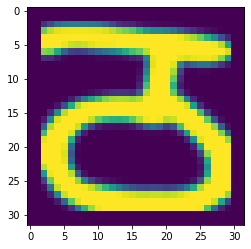

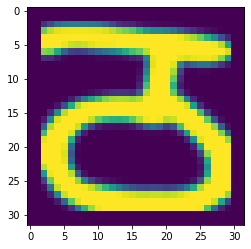

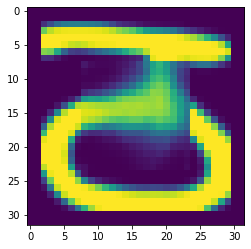

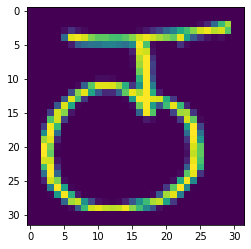

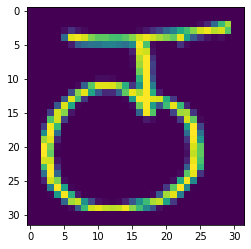

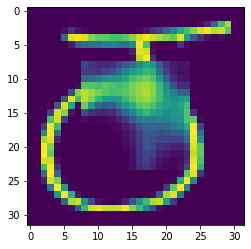

In [171]:
for i in range(2):
    im1 = x[30+i].reshape(32, 32)
    im2 = im1.copy()
    im3=im1.copy()
    im1[8:24, 8:24] = y[30+i].reshape(16, 16)
    im2[8:24, 8:24] = y_pred[30+i].reshape(16, 16)
    plt.imshow(im3.reshape(32, 32))
    plt.show()
    plt.imshow(im1.reshape(32, 32))
    plt.show()
    plt.imshow(im2.reshape(32, 32))
    plt.show()

In [175]:
ytest_pred=kermodel.predict(x_test.reshape(n1,32,32,1))

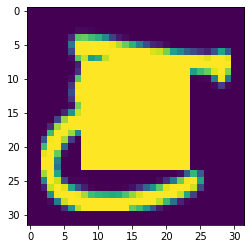

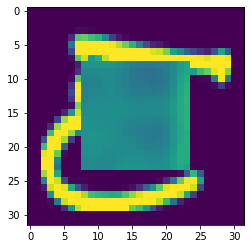

In [176]:
im1 = x_test[600].reshape(32, 32)
im2 = im1.copy()
im1[8:24, 8:24] = y_test[600].reshape(16, 16)
im2[8:24, 8:24] = ytest_pred[600].reshape(16, 16)
plt.imshow(im1.reshape(32, 32))
plt.show()
plt.imshow(im2.reshape(32, 32))
plt.show()